In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("news_dataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  10000 non-null  object
 1   label     10000 non-null  object
 2   text      10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB
None


In [4]:
X=df['text']
y=df['label']

In [5]:
label_names=df['label'].unique()
print(label_names)

['ArthaBanijya' 'Bichar' 'Desh' 'Khelkud' 'Manoranjan' 'Prabas' 'Sahitya'
 'SuchanaPrabidhi' 'Swasthya' 'Viswa']


In [6]:
#task:find freq in category
value_counts=df['label'].value_counts()
print(value_counts)

label
ArthaBanijya       1000
Bichar             1000
Desh               1000
Khelkud            1000
Manoranjan         1000
Prabas             1000
Sahitya            1000
SuchanaPrabidhi    1000
Swasthya           1000
Viswa              1000
Name: count, dtype: int64


In [7]:
value_counts.count

<bound method Series.count of label
ArthaBanijya       1000
Bichar             1000
Desh               1000
Khelkud            1000
Manoranjan         1000
Prabas             1000
Sahitya            1000
SuchanaPrabidhi    1000
Swasthya           1000
Viswa              1000
Name: count, dtype: int64>

Text(0.5, 1.0, 'label')

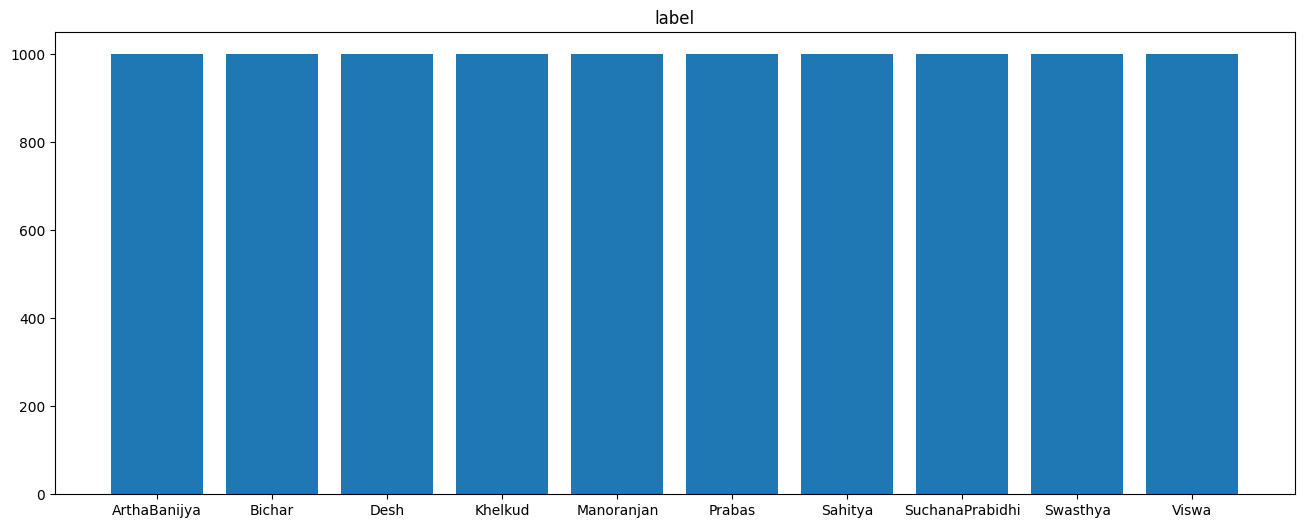

In [17]:
plt.figure(figsize=(16,6))
plt.bar(x=label_names,height=value_counts)
plt.title("label")

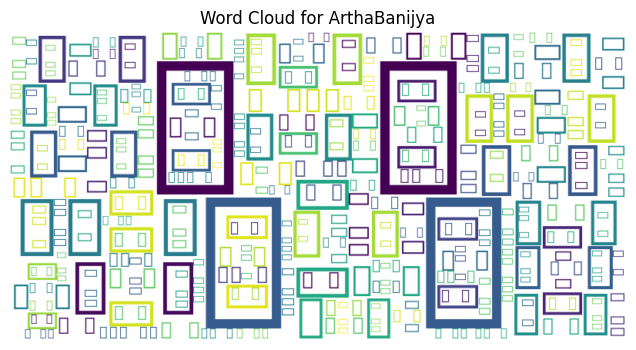

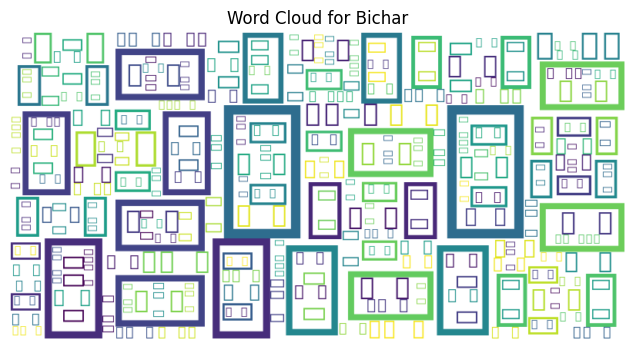

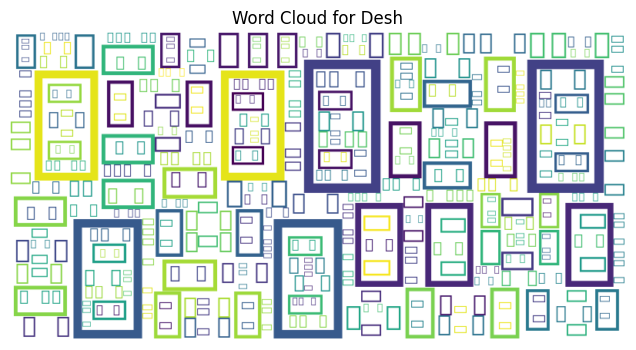

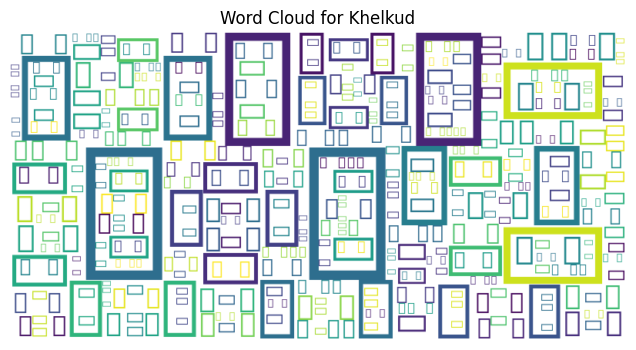

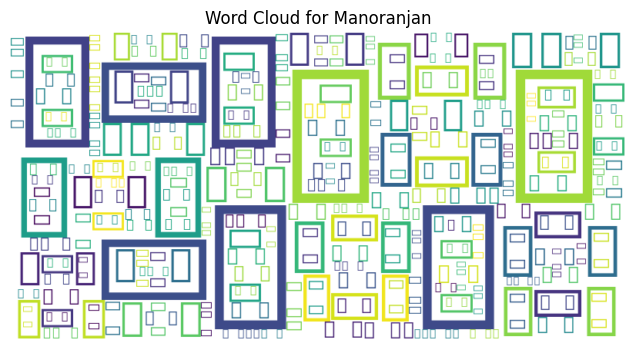

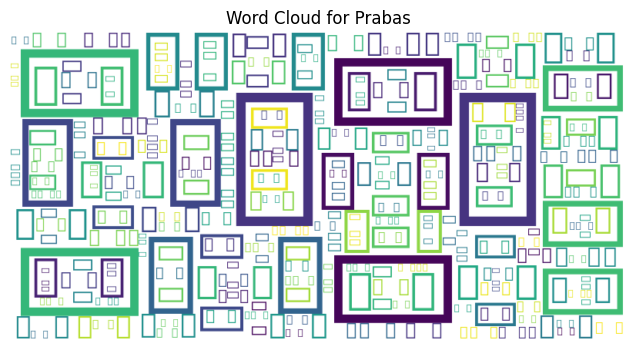

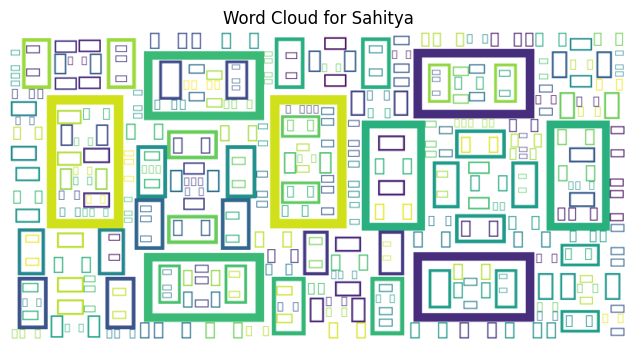

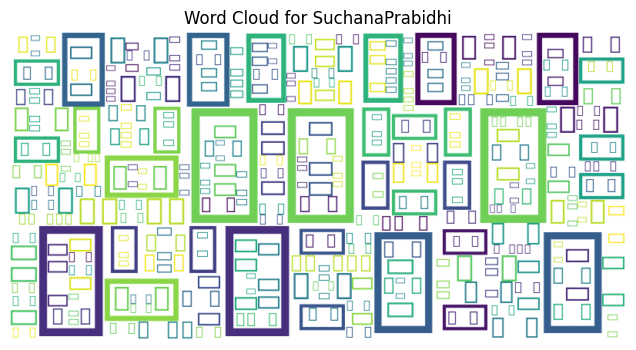

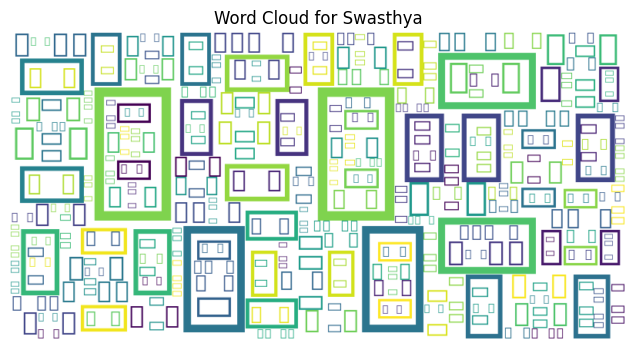

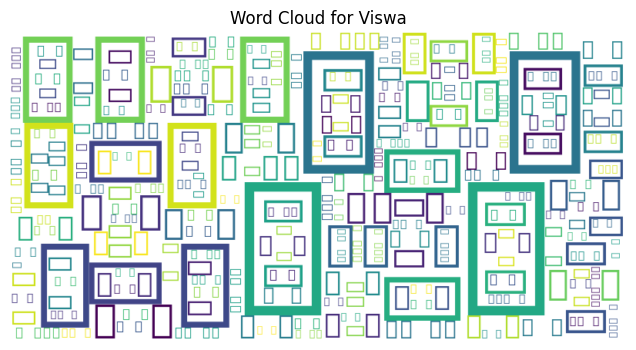

In [11]:
from wordcloud import WordCloud
for label in label_names:
    text=" ".join(df[df['label']==label]['text'].values)
    wordcloud= WordCloud(
        width=800,height=400,background_color='white'
    ).generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(f"Word Cloud for {label}")
    plt.axis('off')
    plt.savefig(f"Word Cloud for {label}.png")
    plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000,)
(8000,)
(2000,)
(2000,)


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import  MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score , classification_report 
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [14]:
nb_model= make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
nb_model.fit(X_train,y_train)
y_preds=nb_model.predict(X_test)
print(f'Accuracy={accuracy_score(y_test,y_preds)*100:.3f}')
print(f'Classification Report\n {classification_report(y_test,y_preds)}')

Accuracy=72.400
Classification Report
                  precision    recall  f1-score   support

   ArthaBanijya       0.75      0.81      0.78       208
         Bichar       0.38      0.99      0.55       202
           Desh       0.92      0.53      0.67       192
        Khelkud       0.98      0.91      0.94       201
     Manoranjan       0.72      0.62      0.67       209
         Prabas       0.84      0.61      0.71       186
        Sahitya       0.72      0.56      0.63       211
SuchanaPrabidhi       0.97      0.73      0.83       204
       Swasthya       0.93      0.83      0.88       212
          Viswa       0.84      0.62      0.71       175

       accuracy                           0.72      2000
      macro avg       0.80      0.72      0.74      2000
   weighted avg       0.80      0.72      0.74      2000



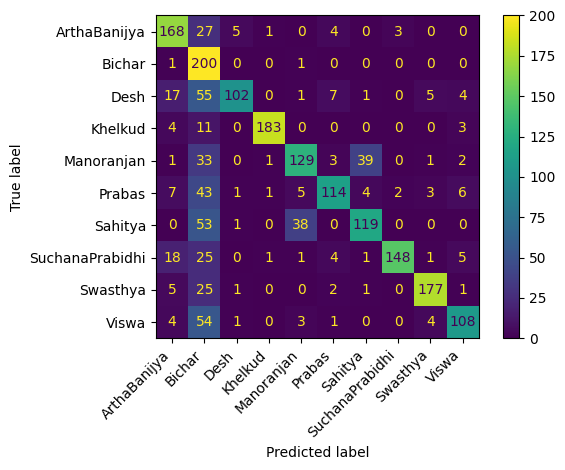

In [25]:
plt.Figure(figsize=(10,8))
cm=confusion_matrix(y_test,y_preds)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['label'].unique())
cm_plot.plot()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("cm.png")
plt.savefig("cm.svg",format="svg")
plt.show()

In [19]:
import joblib
joblib.dump(nb_model, 'model.joblib')
print('SUCCESS')

SUCCESS
